In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Rohlik Sales Forecasting Challenge

/content/drive/MyDrive/Colab Notebooks/Rohlik Sales Forecasting Challenge


## Data Cleaning

In [4]:
train_df = pd.read_csv('data/sales_train.csv')
test_df = pd.read_csv('data/sales_test.csv')
inv_df = pd.read_csv('data/inventory.csv')
calendar = pd.read_csv('data/calendar.csv')

### Date Formating


In [5]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
calendar['date'] = pd.to_datetime(calendar['date'])


### Check Null Values

In [6]:
# find the total null count in train dataframe
null_count = train_df.isnull().sum()
null_count


,0
unique_id,0
date,0
warehouse,0
total_orders,52
sales,52
sell_price_main,0
availability,0
type_0_discount,0
type_1_discount,0
type_2_discount,0


### Merging Tables

In [7]:
train_inv_merge = pd.merge(train_df, inv_df, on = ['unique_id','warehouse'],how = 'left')
train_inv_merge = train_inv_merge.sort_values(by='date')

In [8]:
test_inv_merge = pd.merge(test_df, inv_df, on = ['unique_id','warehouse'],how = 'left')
test_inv_merge = test_inv_merge.sort_values(by='date')

In [9]:
train_inv_merge.isnull().sum()

,0
unique_id,0
date,0
warehouse,0
total_orders,52
sales,52
sell_price_main,0
availability,0
type_0_discount,0
type_1_discount,0
type_2_discount,0


## Data Exploration

In [10]:
import matplotlib.pyplot as plt

In [11]:
calendar = calendar.sort_values('date')
merged_df = pd.merge(train_inv_merge, calendar, on = ['date','warehouse'],how = 'left')

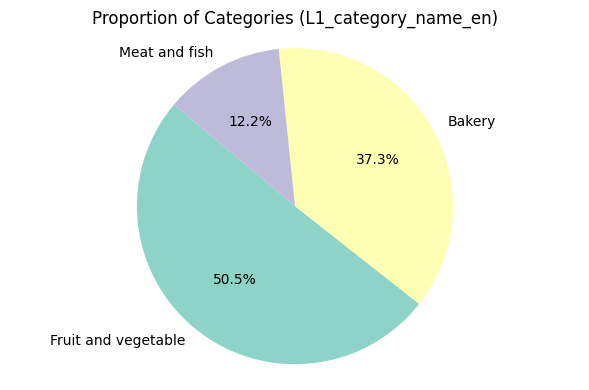

In [12]:
# Calculate the count of each L1_category_name_en
category_counts = merged_df['L1_category_name_en'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 4))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Proportion of Categories (L1_category_name_en)')
plt.axis('equal')
plt.tight_layout()
plt.show()


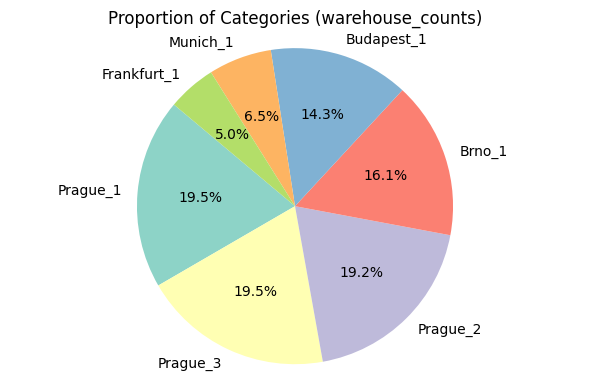

In [13]:
# Calculate the count of each L1_category_name_en
warehouse_counts = merged_df['warehouse'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 4))
plt.pie(
    warehouse_counts,
    labels=warehouse_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Proportion of Categories (warehouse_counts)')
plt.axis('equal')
plt.tight_layout()
plt.show()


### GroupBy month

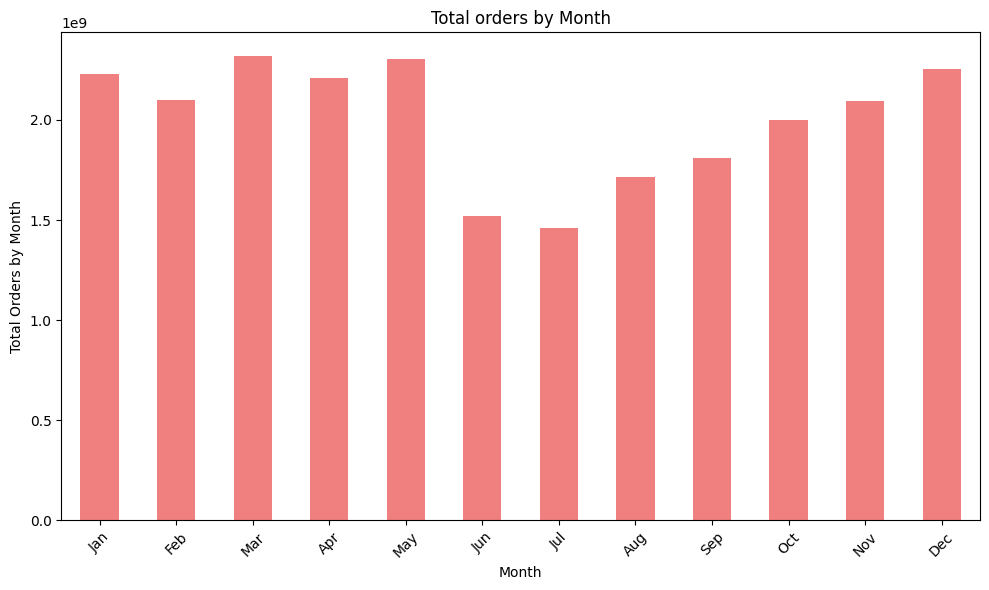

In [14]:
# Extract month
train_df['month'] = train_df['date'].dt.month

# Group by month and sum sell_price_main
monthly_sell_price = train_df.groupby('month')['total_orders'].sum()
# Plot the monthly sell_price_main
monthly_sell_price.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Total orders by Month')
plt.xlabel('Month')
plt.ylabel('Total Orders by Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()



### GroupBy Warehouse

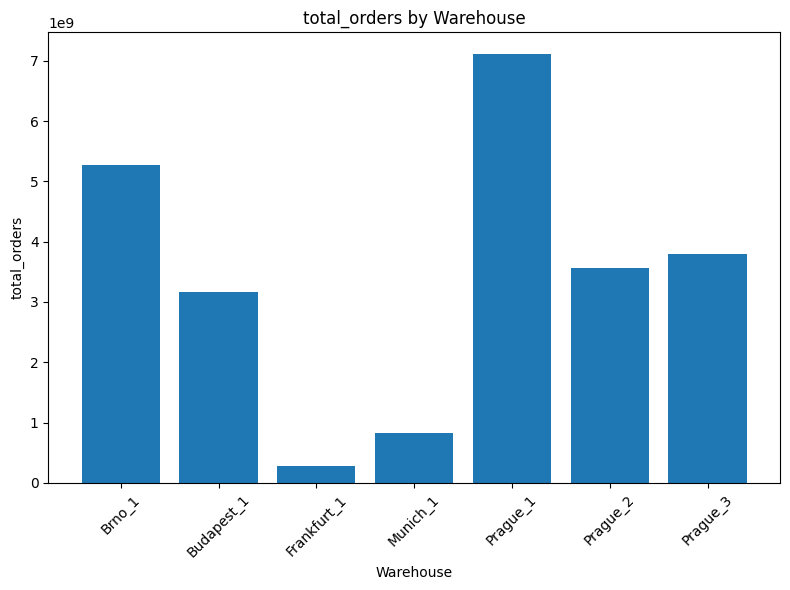

In [15]:
warehouse_counts = train_df.groupby('warehouse')[['total_orders']].sum()
# Loop through the columns to create a separate bar chart for each
for column in warehouse_counts.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(warehouse_counts.index, warehouse_counts[column])
    plt.title(f"{column} by Warehouse")
    plt.xlabel("Warehouse")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### GroupBy by Category in Discount(Different Discount Strategies)

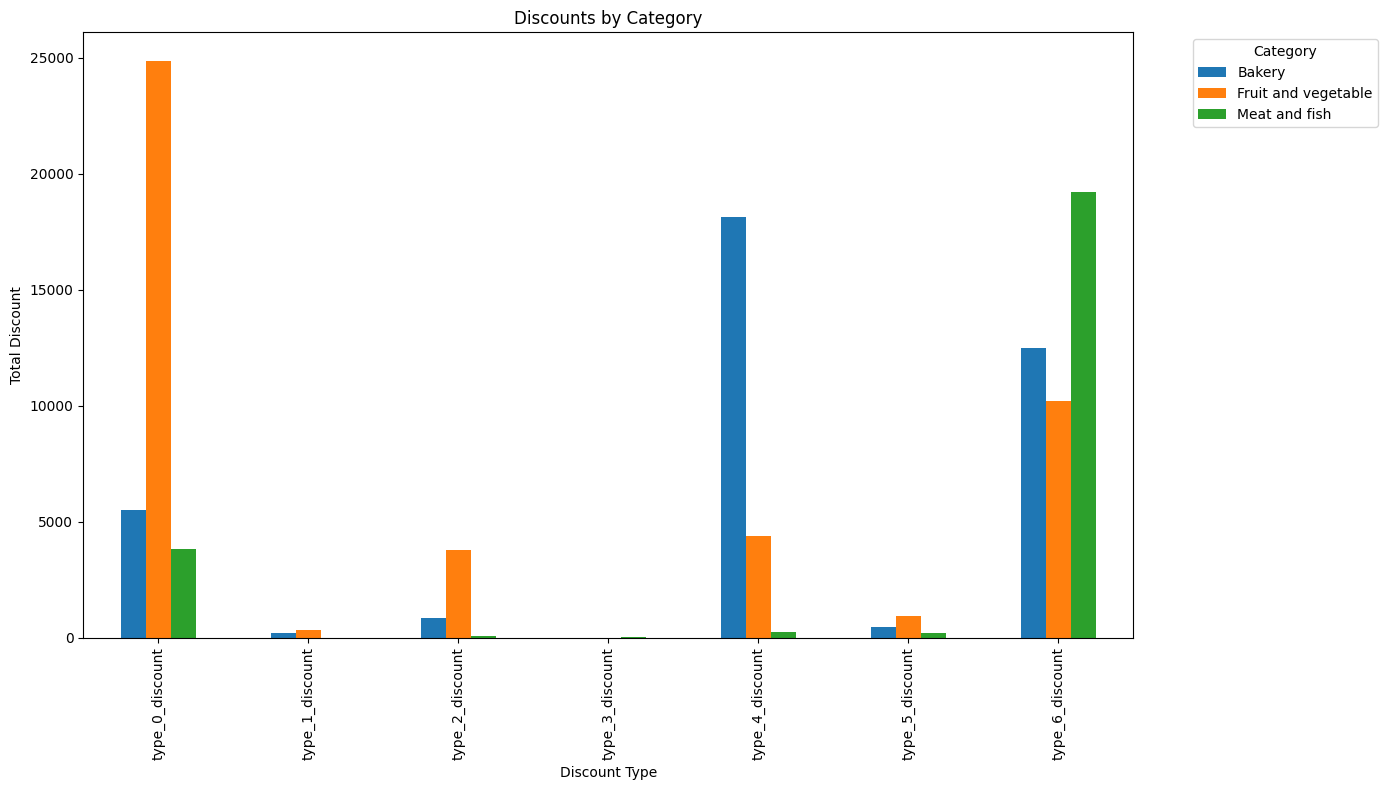

In [16]:
Category_discount_counts = train_inv_merge.groupby('L1_category_name_en')[['type_0_discount', 'type_1_discount', 'type_2_discount','type_3_discount','type_4_discount','type_5_discount','type_6_discount']].sum()


# Transpose for easier plotting
Category_discount_counts_T = Category_discount_counts.T

# Plot each discount type
Category_discount_counts_T.plot(kind='bar', figsize=(14, 8))
plt.title('Discounts by Category')
plt.xlabel('Discount Type')
plt.ylabel('Total Discount')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### GroupBy Holiday

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   warehouse               object        
 3   total_orders            float64       
 4   sales                   float64       
 5   sell_price_main         float64       
 6   availability            float64       
 7   type_0_discount         float64       
 8   type_1_discount         float64       
 9   type_2_discount         float64       
 10  type_3_discount         float64       
 11  type_4_discount         float64       
 12  type_5_discount         float64       
 13  type_6_discount         float64       
 14  product_unique_id       int64         
 15  name                    object        
 16  L1_category_name_en     object        
 17  L2_category_name_en     object        
 18  L3

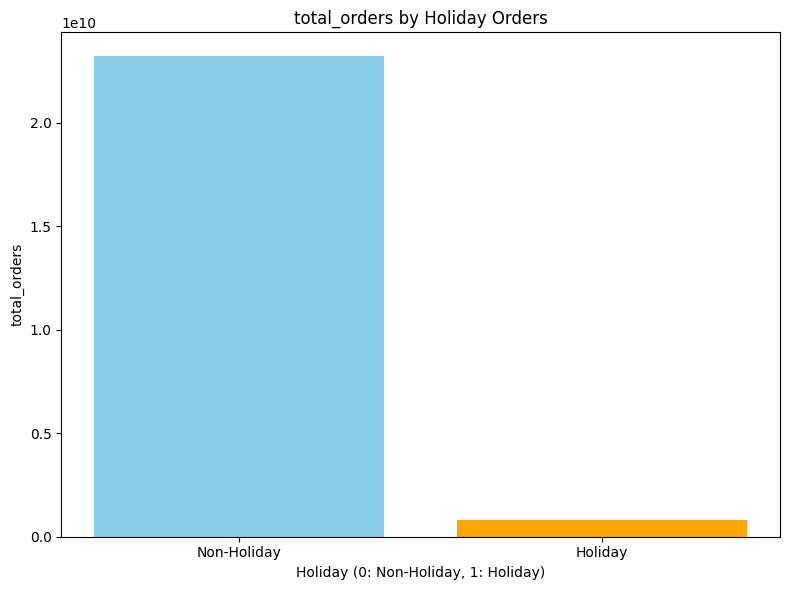

In [18]:
import matplotlib.pyplot as plt

# Ensure the 'holiday' column contains only binary values (0 or 1)
merged_df['holiday'] = merged_df['holiday'].apply(lambda x: 1 if x == 1 else 0)

# Group by 'holiday' and sum 'total_orders'
Holiday_orders = merged_df.groupby('holiday')[['total_orders']].sum()

# Loop through the columns to create a separate bar chart for each
for column in Holiday_orders.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(Holiday_orders.index, Holiday_orders[column], color=['skyblue', 'orange'])
    plt.title(f"{column} by Holiday Orders")
    plt.xlabel("Holiday (0: Non-Holiday, 1: Holiday)")
    plt.ylabel(column)
    plt.xticks(ticks=[0, 1], labels=["Non-Holiday", "Holiday"])
    plt.tight_layout()
    plt.show()


### Relation between Days to Holidays and Sales



Relation between Days to Holidays and Sales

In [19]:
# Calculate days difference between sales s day and closest previous and next hoiday
for warehouse in train_df['warehouse'].unique():
  holiday_date = calendar[(calendar['holiday']==1) & (calendar['warehouse']==warehouse)]['date']

  subset = train_df[train_df['warehouse']==warehouse]

  previous_holiday= pd.to_datetime((pd.cut(x = subset['date'], bins = holiday_date.sort_values()).apply(lambda x: x.left)).astype('str'))
  next_holiday = pd.to_datetime(pd.cut(x = subset['date'], bins = holiday_date.sort_values()).apply(lambda x: x.right).astype('str'))

  previous_holiday_diff = (subset['date'] - pd.to_datetime((pd.cut(x = subset['date'], bins = holiday_date.sort_values()).apply(lambda x: x.left)).astype('str'))).dt.days
  next_holiday_diff = (pd.to_datetime(pd.cut(x = subset['date'], bins = holiday_date.sort_values()).apply(lambda x: x.right).astype('str')) - subset['date']).dt.days

  train_df.loc[train_df['warehouse']==warehouse, 'previous_holiday'] = previous_holiday
  train_df.loc[train_df['warehouse']==warehouse, 'next_holiday'] = next_holiday

  train_df.loc[train_df['warehouse']==warehouse, 'previous_holiday_diff'] = previous_holiday_diff
  train_df.loc[train_df['warehouse']==warehouse, 'next_holiday_diff'] = next_holiday_diff


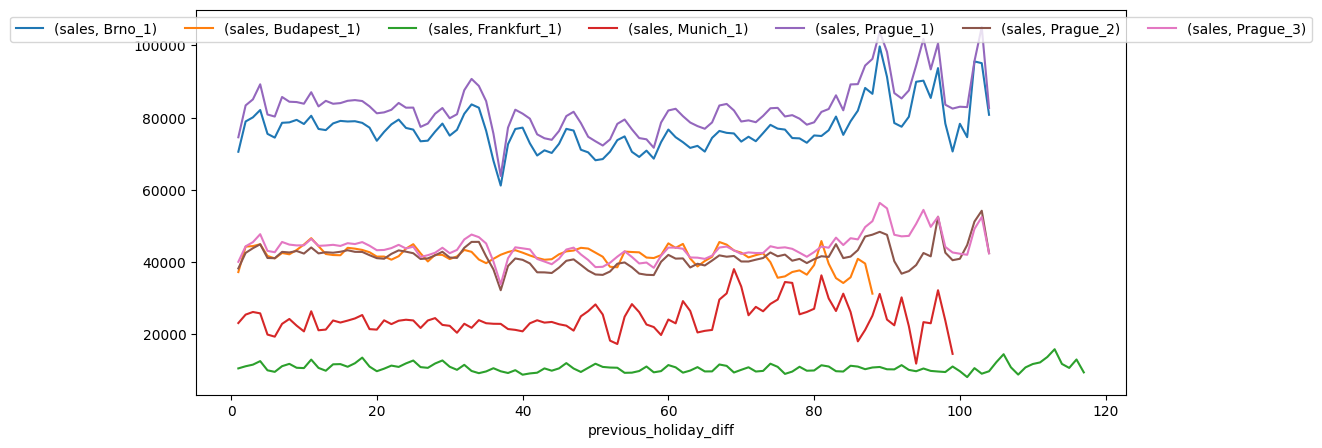

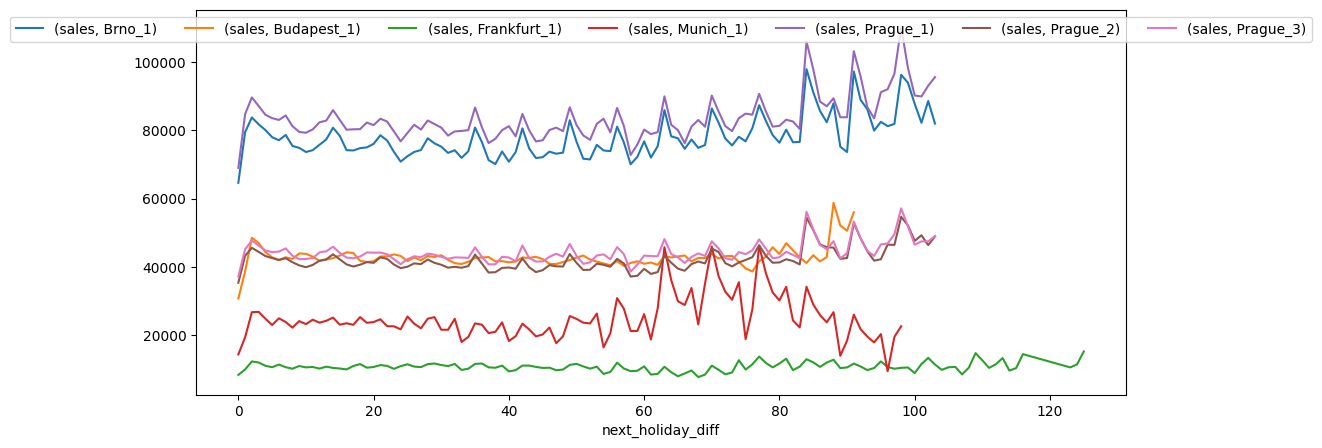

In [20]:
#Mean Sales grouped by warehouse and Holiday days difference
temp = train_df[['unique_id','date', 'warehouse', 'sales', 'previous_holiday_diff', 'next_holiday_diff']]
temp = temp.groupby(['warehouse', 'date']).agg({'sales':'sum', 'previous_holiday_diff':'mean', 'next_holiday_diff':'mean'}).reset_index()
temp_previous = temp.groupby(['warehouse', 'previous_holiday_diff']).agg({'sales':'mean'}).unstack(level='warehouse')
temp_next = temp.groupby(['warehouse', 'next_holiday_diff']).agg({'sales':'mean'}).unstack(level='warehouse')

#Plot Mean sales grouped by warehouse and days difference between sales day and previous holiday
fig, ax = plt.subplots(figsize=(12, 5))
temp_previous.plot(ax=ax)
ax.legend(loc='upper center', ncol=7)

#Plot Mean sales grouped by warehouse and days difference between sales day and next holiday
fig, ax = plt.subplots(figsize=(12, 5))
temp_next.plot(ax=ax)
ax.legend(loc='upper center', ncol=7)



In [21]:
# Pearson correlation between sales and holiday days difference
temp[['sales', 'previous_holiday_diff', 'next_holiday_diff']].corr()

,sales,previous_holiday_diff,next_holiday_diff
sales,1.000000,-0.014843,0.027023
previous_holiday_diff,-0.014843,1.000000,-0.236906
next_holiday_diff,0.027023,-0.236906,1.000000


#### Relationship between Holiday and Sales

In [22]:
# Pearson correlation between sales and exact day of holiday
holiday_sales_2 = merged_df.groupby(['warehouse', 'date', 'holiday']).agg({'sales':'sum'}).reset_index()
holiday_sales_2 = holiday_sales_2.groupby(['warehouse', 'holiday']).agg({'sales':'mean'}).reset_index()
holiday_sales_2[['holiday', 'sales']].corr()

,holiday,sales
holiday,1.000000,-0.191389
sales,-0.191389,1.000000


holiday,0,1
warehouse,,
Brno_1,76619.975781,64605.944483
Budapest_1,42721.036789,30804.493016
Frankfurt_1,10834.009645,8487.773947
Munich_1,23896.070220,14445.229464
Prague_1,82185.510357,68982.940172
Prague_2,41595.594539,35402.762586
Prague_3,43823.683207,37233.795862


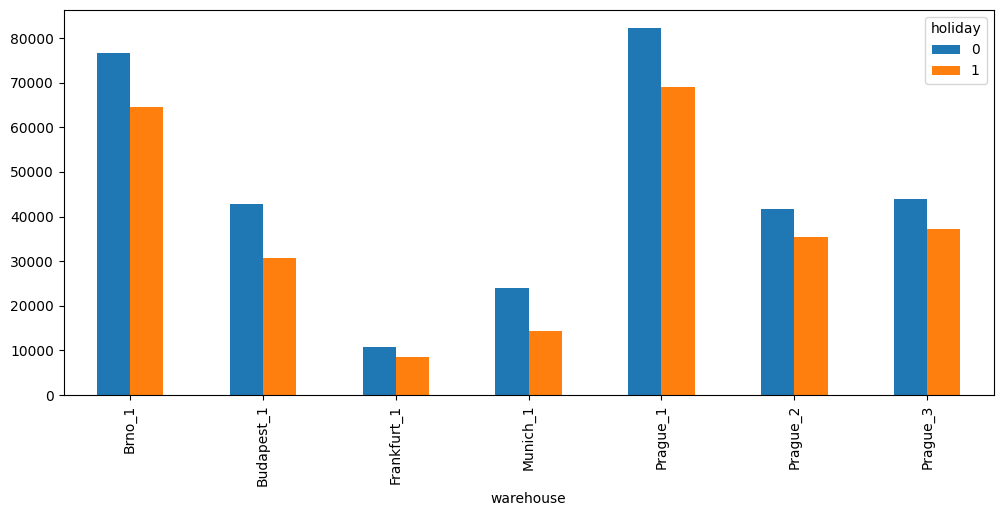

In [23]:
# Plot mean sale grouped by holiday and warehouse
holiday_sales_2 = merged_df.groupby(['warehouse', 'date', 'holiday']).agg({'sales':'sum'}).reset_index()
holiday_sales_2 = holiday_sales_2.groupby(['warehouse', 'holiday']).agg({'sales':'mean'}).reset_index()

holiday_sales_2 = holiday_sales_2.pivot(columns='holiday', index='warehouse', values='sales')
holiday_sales_2.plot(kind='bar', figsize=(12, 5))

holiday_sales_2

#### Sales and Time

<Axes: xlabel='date'>

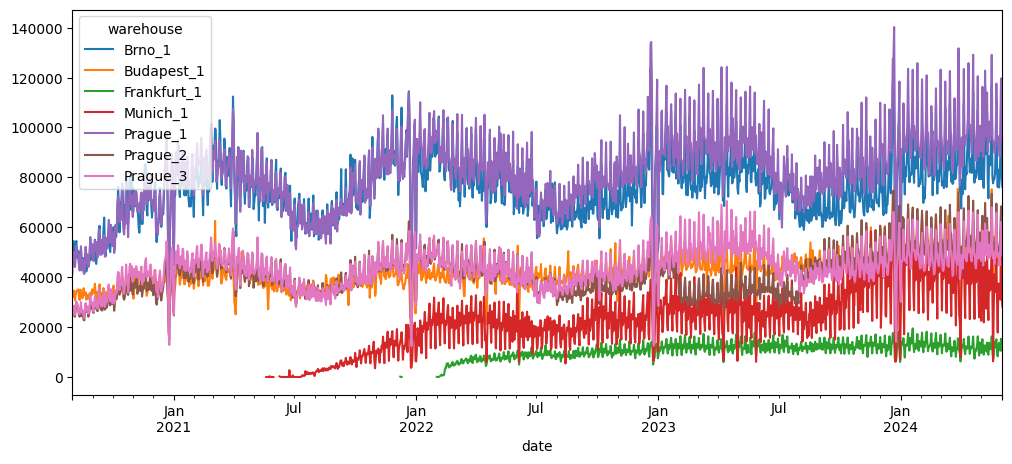

In [24]:
# Sales through time
merged_df\
.groupby(['warehouse', 'date']).agg({'sales':'sum'}).reset_index()\
.pivot(columns='warehouse', index='date', values='sales')\
.plot(kind='line', figsize=(12, 5))


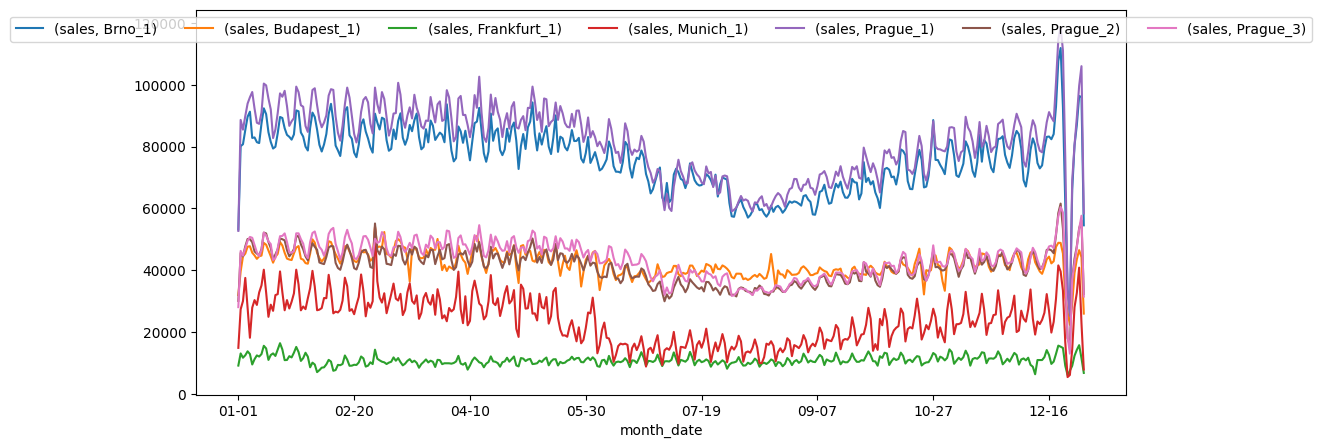

In [25]:
#get month-date column
merged_df['month_date'] = merged_df['date'].dt.strftime('%m-%d')

#plot mean sales of day in a year
fig, ax = plt.subplots()
merged_df\
.groupby(['warehouse', 'date', 'month_date']).agg({'sales':'sum'}).reset_index()\
.groupby(['warehouse', 'month_date']).agg({'sales':'mean'})\
.unstack('warehouse')\
.plot(kind='line', figsize=(12, 5), ax=ax)
ax.legend(loc='upper center', ncol=7)

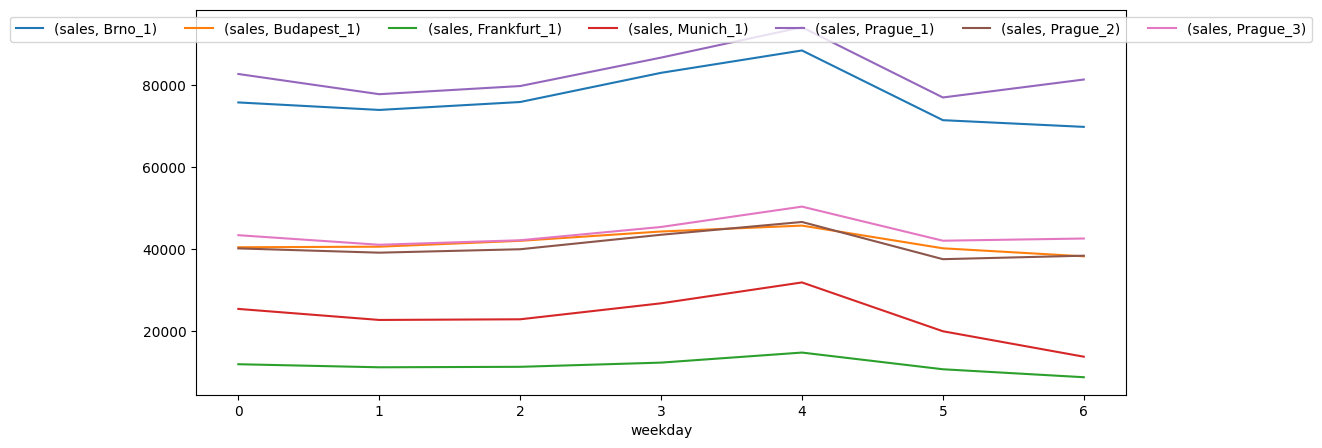

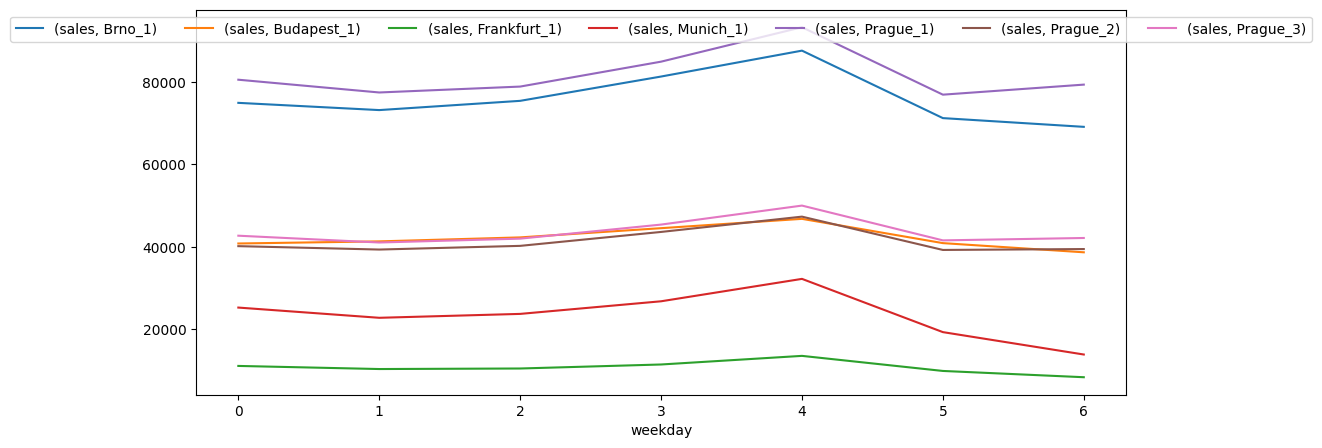

In [26]:
#get weekday column
merged_df['weekday'] = merged_df['date'].dt.weekday

#plot median sales of each weekday
fig, ax = plt.subplots()
merged_df\
.groupby(['warehouse', 'date', 'weekday']).agg({'sales':'sum'}).reset_index()\
.groupby(['warehouse', 'weekday']).agg({'sales':'median'})\
.unstack('warehouse')\
.plot(kind='line', figsize=(12, 5), ax=ax)
ax.legend(loc='upper center', ncol=7)

#plot mean sales of each weekday
fig, ax = plt.subplots()
merged_df\
.groupby(['warehouse', 'date', 'weekday']).agg({'sales':'sum'}).reset_index()\
.groupby(['warehouse', 'weekday']).agg({'sales':'mean'})\
.unstack('warehouse')\
.plot(kind='line', figsize=(12, 5), ax=ax)
ax.legend(loc='upper center', ncol=7)
